# Recommender Systems

## Import Libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

sns.set(style='darkgrid')
%matplotlib inline

## Get the Data

In [39]:
df = pd.read_csv('hotel.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,title,rating,review,address,user_id
0,Mövenpick Hotel Ankara,2.7,1,"Beştepeler Mah. Yaşam Cad. No: 1 Söğütözü, Ank...",3
1,Atalay Hotel,2.9,52,"Çankırı Cad. No 20, Ankara 06030 Türkiye",1
2,Hotel Ergen,1.9,6,"Karanfil Sok. No:48 Kızılay, Çankaya, Ankara 0...",2
3,Hotel Ayma,2.1,13,"Meşrutiyet Cad. No:25 Kızılay, Çankaya, Ankara...",2
4,Erk Otel,2.4,1,"Menekşe Sok. No:27 Kızılay, Çankaya, Ankara Tü...",6
...,...,...,...,...,...
2745,Demonti Hotel,0.5,146,"Akay Caddesi No:8, Ankara 06660 Türkiye",10
2746,Sergah Hotel,0.0,114,"Cankiri Caddesi, 48, Ankara 06030 Türkiye",10
2747,Ankacity Suit Flat,0.0,28,"Emek Mahallesi 26. Sokak No: 3, Ankara Türkiye",6
2748,Business Grand Hotel,2.8,23,"Gazi Mustafa Kemal Bulvari 70, Ankara 06570 Tü...",8


# EDA
## Visualization Imports

Let's create a ratings dataframe with average rating and number of ratings:

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    2750 non-null   object 
 1   rating   2750 non-null   float64
 2   review   2750 non-null   int64  
 3   address  2750 non-null   object 
 4   user_id  2750 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 107.5+ KB


In [41]:
df.isnull().sum()

title      0
rating     0
review     0
address    0
user_id    0
dtype: int64

In [42]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,2750,320,Başkent Öğretmenevi,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,2750,NaN,NaN,NaN,2.32364,1.11939,0,1.6,2.4,3.1,5
review,2750,NaN,NaN,NaN,53.8771,110.417,1,4,18,53,970
address,2750,320,"Bestekar Sokak No:26, Ankara 81580 Türkiye",10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,2750,NaN,NaN,NaN,5.5,2.88468,1,3,6,8,10


In [43]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending=False))
ratings.head()

,rating
title,
Sc Inn Hotel Ankara,3.483333
Business Park Hotel,3.433333
Guleryuz Hotel,3.262500
Reda Palas,3.250000
New Park Hotel,3.230000


Now set the number of ratings column:

In [44]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
Sc Inn Hotel Ankara,3.483333,6
Business Park Hotel,3.433333,6
Guleryuz Hotel,3.262500,8
Reda Palas,3.250000,6
New Park Hotel,3.230000,10


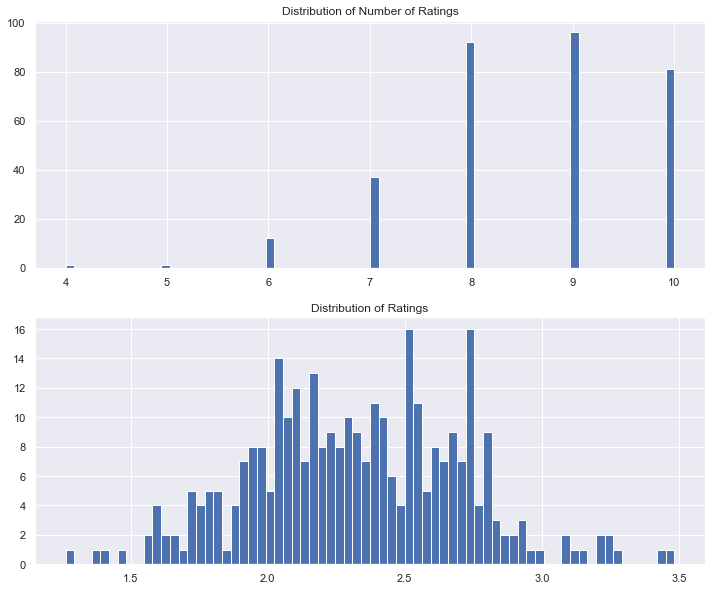

In [45]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.title("Distribution of Number of Ratings")
ratings['num of ratings'].hist(bins=70)
plt.subplot(212)
plt.title("Distribution of Ratings")
ratings['rating'].hist(bins=70)
plt.show()

## Recommending Similar Hotels

* Now let's create a matrix that has the user ids on one access and the hotel title on another axis. 
* Each cell will then consist of the rating the user gave to that hotel. Note there will be a lot of NaN values, because most people have not seen most of the hotels.
* Önce, bir eksende kullanıcı kimliklerinin ve diğer eksende otel adlarının olduğu bir matris oluşturacağız. Boylece otellerin birbiriyle arasinda korelasyona erismeye calisacagiz. Original data frame'den sadece otel adı, kullanıcı kimliği ve otelin derecelendirmesiyle ilgileniyoruz.
* Kullanıcıların (user ID) otellere verdikleri gerçek derecelendirmeye sahip Pivot Table olusturup, aradan otellerden secip, o oteller benzer otelleri modele buldurmaya calisacagiz.


In [46]:
df.describe()

,rating,review,user_id
count,2750.000000,2750.000000,2750.000000
mean,2.323636,53.877091,5.500000
std,1.119389,110.417269,2.884682
min,0.000000,1.000000,1.000000
25%,1.600000,4.000000,3.000000
50%,2.400000,18.000000,6.000000
75%,3.100000,53.000000,8.000000
max,5.000000,970.000000,10.000000


In [47]:
matrix_hotel = df.pivot_table(index='user_id', columns='title', values='rating', )
matrix_hotel.head()

title,A Apart Otel,A&C Kiz Ogrenci Yurdu 3. Sube,Ab-i Hayat Thermal Hotel,Ada Palas Otel,Aden Apart,Ak Life Hotel & Suite,Akar International Hotel,Akman TZOB Otel,Aktaş Otel,Akya Hotel,...,Yeni Yavuz Hoteli,Yildiz Hotel,Yurt Akademi Ankara,Zarina Butik Hotel,concept house,Çankaya İmkb Mesleki ve Teknik Anadolu Lisesi Uygulama Oteli,Çankırı Büyük Hotel,Ümit Pembe Köşk Hotel,İlci Residence Otel,Şahinbey Otel
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,2.6,NaN,2.3,1.6,3.0,2.8,2.6,0.5,1.9,...,2.4,NaN,NaN,2.1,2.8,1.2,3.6,1.8,3.5,2.0
2,NaN,1.4,NaN,2.6,NaN,4.1,2.6,3.5,5.0,1.6,...,2.8,1.8,NaN,3.0,0.0,NaN,NaN,2.7,3.3,2.1
3,1.8,2.8,3.5,4.5,1.7,3.1,4.3,3.3,1.4,0.3,...,3.0,1.5,1.4,NaN,NaN,2.8,2.4,3.3,1.0,NaN
4,4.3,2.1,1.3,NaN,1.9,2.8,2.3,3.0,1.9,1.4,...,1.0,4.5,3.1,1.3,2.0,0.4,2.8,1.1,2.3,0.0
5,NaN,1.5,1.4,2.1,3.0,2.8,1.3,2.3,3.3,NaN,...,1.2,3.1,1.3,NaN,3.6,NaN,2.8,1.6,1.7,2.5


In [48]:
matrix_hotel.shape

(10, 320)

Most rated hotel:

In [49]:
ratings.sort_values('rating',ascending=False).head(10)

,rating,num of ratings
title,,
Sc Inn Hotel Ankara,3.483333,6
Business Park Hotel,3.433333,6
Guleryuz Hotel,3.262500,8
Reda Palas,3.250000,6
New Park Hotel,3.230000,10
Ankara Trend House Apart,3.214286,7
Koyunlu Hotel,3.200000,8
Park Otel,3.157143,7
Patalya Lakeside Resort Hotel,3.114286,7


In [50]:
Elit_Otel_user_ratings = matrix_hotel['Elit Otel']
Ankara_HiltonSA_user_ratings = matrix_hotel['Ankara HiltonSA']
Elit_Otel_user_ratings.head()

user_id
1    2.0
2    NaN
3    0.5
4    3.5
5    2.5
Name: Elit Otel, dtype: float64

In [51]:
Ankara_HiltonSA_user_ratings.head()

user_id
1    0.0
2    1.8
3    2.6
4    1.8
5    3.1
Name: Ankara HiltonSA, dtype: float64

#### with Pearson Correlation Method

In [52]:
similar_to_elite = matrix_hotel.corrwith(Elit_Otel_user_ratings, method='pearson')
similar_to_hilton = matrix_hotel.corrwith(Ankara_HiltonSA_user_ratings, method='pearson')

In [53]:
similar_to_elite

title
A Apart Otel                                                    0.456346
A&C Kiz Ogrenci Yurdu 3. Sube                                  -0.662580
Ab-i Hayat Thermal Hotel                                       -0.767142
Ada Palas Otel                                                 -0.379068
Aden Apart                                                      0.009744
                                                                  ...   
Çankaya İmkb Mesleki ve Teknik Anadolu Lisesi Uygulama Oteli    0.029309
Çankırı Büyük Hotel                                            -0.512447
Ümit Pembe Köşk Hotel                                          -0.730659
İlci Residence Otel                                             0.222623
Şahinbey Otel                                                  -0.303094
Length: 320, dtype: float64

In [54]:
similar_to_hilton

title
A Apart Otel                                                   -0.388925
A&C Kiz Ogrenci Yurdu 3. Sube                                  -0.088885
Ab-i Hayat Thermal Hotel                                       -0.105623
Ada Palas Otel                                                  0.325931
Aden Apart                                                      0.571719
                                                                  ...   
Çankaya İmkb Mesleki ve Teknik Anadolu Lisesi Uygulama Oteli    0.364638
Çankırı Büyük Hotel                                            -0.156307
Ümit Pembe Köşk Hotel                                          -0.264289
İlci Residence Otel                                            -0.880788
Şahinbey Otel                                                  -0.011440
Length: 320, dtype: float64

### Top 10 hotels that are most similar to `Ankara HiltonSA`

In [55]:
corr_hilton = pd.DataFrame(similar_to_hilton,columns=['Correlation'])
corr_hilton.dropna(inplace=True)
corr_hilton = corr_hilton.join(ratings['num of ratings'])
corr_hilton.sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Ankara HiltonSA,1.000000,10
Bilkent Hotel and Conference Center,0.918966,9
Ostimpark Business Hotel,0.834675,7
CPAnkara Hotel,0.798652,7
Park 12,0.777295,8
Zarina Butik Hotel,0.759676,7
Aycha Butik Hotel,0.754893,9
Royal Anka Hotel Cankaya,0.748175,9
Otel KGZ Konagi,0.707243,8


### Top 10 hotels that are most similar to `Elit Otel`

In [56]:
corr_elite = pd.DataFrame(similar_to_elite,columns=['Correlation'])
corr_elite.dropna(inplace=True)
corr_elite = corr_elite.join(ratings['num of ratings'])
corr_elite.sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Elit Otel,1.000000,9
Tunalı Hotel,0.821285,9
Class Otel,0.809101,9
City Hotel Ankara,0.776409,9
Hotel Samm,0.771198,10
Aldino Residence,0.764984,5
Beypalas Hotel,0.751287,8
Warwick Ankara,0.743180,7
Mina 1 Otel,0.731322,10
